 ## House Price Prediction Regression Project 

## 
Project Goal

## load Modules / libraries


In [1]:
#install below libraries by following commad in anacoda promt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar


from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler



## Load dataset

In [2]:
train_data_path = r"D:\house_price_prediction\data\train.csv"
test_data_path = r"D:\house_price_prediction\data\test.csv"

 
df_train=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)

print("shape of df_train: ", df_train.shape)
print("shape of df_test:  ",df_test.shape)

shape of df_train:  (1460, 81)
shape of df_test:   (1459, 80)


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
 df_train.head(10)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [5]:
df_test.head(5)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## know your data

## data integration

In [6]:
df = pd.concat([df_train, df_test])

print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


## Get the brief information of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [8]:
int_features=df.select_dtypes(include=["int64"]).columns
print("total number of int features :",int_features.shape[0])
print("integer-features",int_features.tolist());

total number of int features : 26
integer-features ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
float_features=df.select_dtypes(include=["float64"]).columns
print("total number of float features :",float_features.shape[0])
print("float-features",float_features.tolist());

total number of float features : 12
float-features ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [10]:
cat_features=df.select_dtypes(include=["object"]).columns
print("total number of object features :",cat_features.shape[0])
print("object-features",cat_features.tolist());

total number of object features : 43
object-features ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the statistical information of numerical Feature

In [11]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [12]:
df.describe().shape

(8, 38)

## data Cleaning

## Visualize null /Missing Value

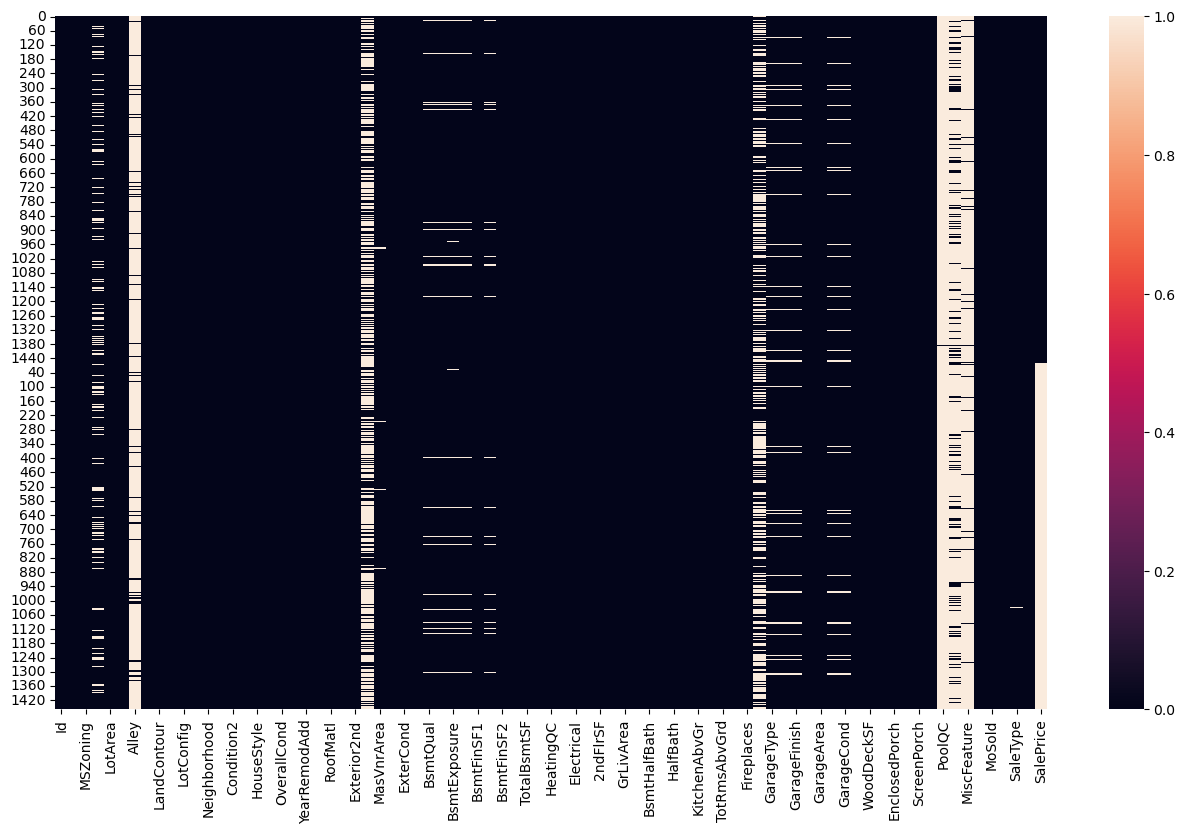

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

In [14]:
# set index as ID column
df=df.set_index("Id")

In [15]:
null_count =df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

## Percentage of data missing for the names

In [16]:
null_percent =df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## DROP COLUMNS/FEATURES

In [17]:
""" as per our domain knowlegde we are not going to drop toose features,instead wee will add a constant value where ever there is none"""
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [18]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [19]:
miss_value_20_50_perc=null_percent[(null_percent>20) &(null_percent <51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [20]:
miss_value_5_20_perc=null_percent[(null_percent>5) &(null_percent <20)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<Axes: ylabel='Id'>

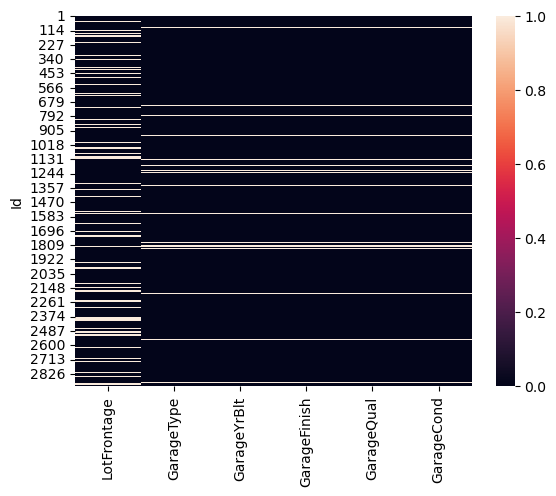

In [21]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

## MISSING VALUE IMPULATION

In [22]:
missing_value_feat =null_percent[null_percent>0]
print("Total missing value features",len(missing_value_feat))

Total missing value features 35


In [23]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [24]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total number of categorical missing features =",len(cat_na_feat))
cat_na_feat

total number of categorical missing features = 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [25]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total number of integer missing features =",len(int_na_feat))
int_na_feat

total number of integer missing features = 0


Series([], dtype: float64)

In [26]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total number of categorical missing features =",len(float_na_feat))
float_na_feat

total number of categorical missing features = 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### handling MSZoning=0.127033

In [27]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

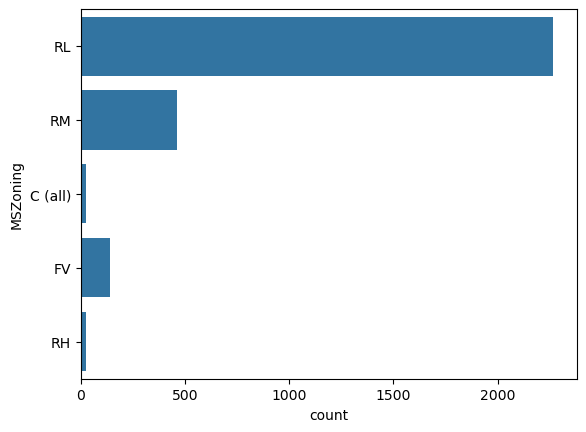

In [28]:
sns.countplot(df["MSZoning"])

In [29]:
### backup of original data
df_mvi=df.copy()
df_mvi.shape


(2919, 80)

In [30]:
mszoning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan ,mszoning_mode)
df_mvi["MSZoning"].isnull().sum() 

4

In [31]:
def oldNewCountPlot(df,df_new,feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("old data distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("new data distribution")
    


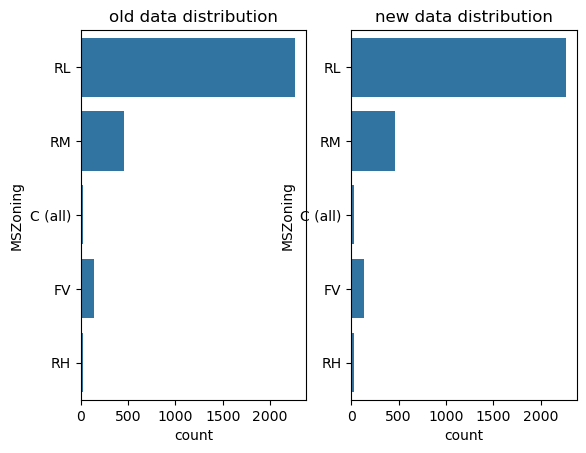

In [32]:
oldNewCountPlot(df,df_mvi,"MSZoning")

## HANDLING ALLEY=93.216855

In [33]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [34]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan,alley_cont )
df_mvi["Alley"].isnull().sum()

2721

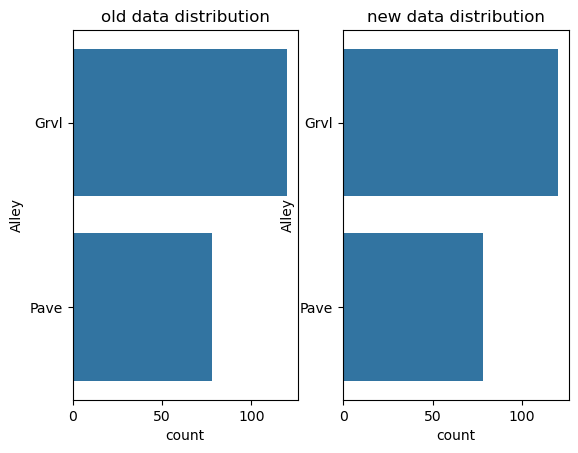

In [35]:
oldNewCountPlot(df,df_mvi,"Alley")

## handling LotFrontage=16.659538

In [36]:
def boxHistPlot(df, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df)
    plt.subplot(222)
    sns.displot(df)

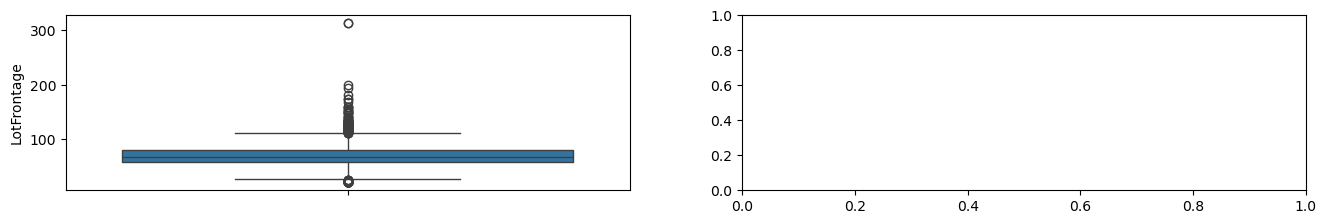

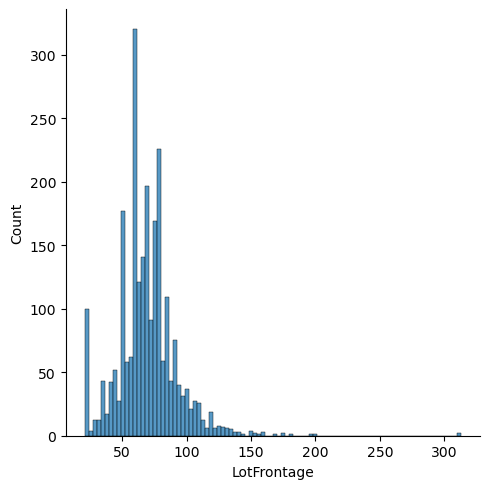

In [37]:
boxHistPlot(df["LotFrontage"])

In [38]:
lotlrontage_mean =df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotlrontage_mean, inplace =True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\1108347456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotlrontage_mean, inplace =True)


0

In [39]:
def oldNewBoxHistPlot(df,df_new,feature,figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("old data distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("old data distribution")
    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title(" new data distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("new data distribution")

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\1649240654.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\binay\AppData\Local\Temp\ipykernel_2112\1649240654.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


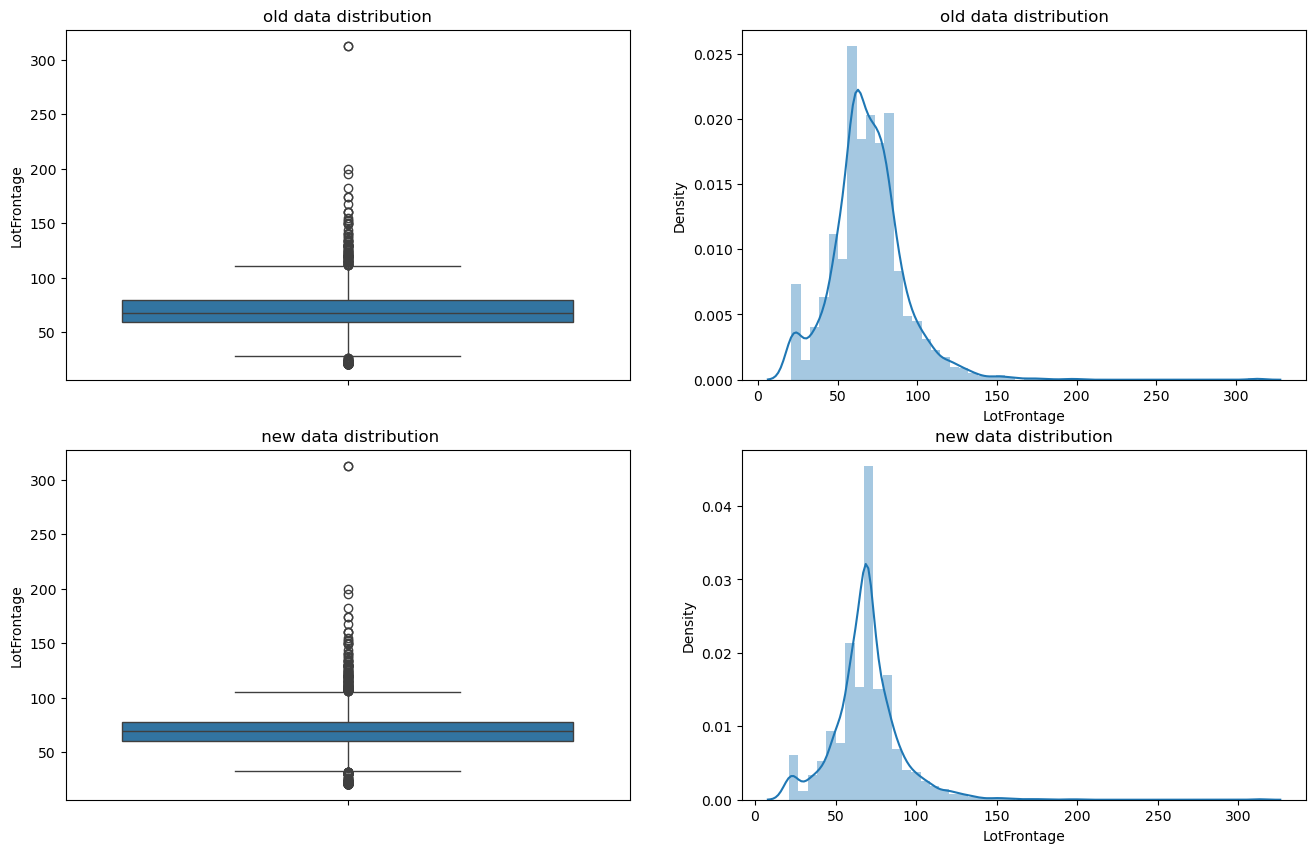

In [40]:
oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

## handling Utilities = 0.068517

In [41]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [42]:
utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode ,inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\1843644836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode ,inplace=True)


0

## handling exterior 1st and exterior second

In [43]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [44]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [45]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
Exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode ,inplace=True)
df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode ,inplace=True)
print("e1st is null:" ,df_mvi["Exterior1st"].isnull().sum())
print("e2nd is null:" ,df_mvi["Exterior2nd"].isnull().sum())

e1st is null: 0
e2nd is null: 0


C:\Users\binay\AppData\Local\Temp\ipykernel_2112\2546102011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode ,inplace=True)
C:\Users\binay\AppData\Local\Temp\ipykernel_2112\2546102011.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

##  handling MasVnrType = 60.500171  and MasVnrArea  0.787941


<Axes: ylabel='Id'>

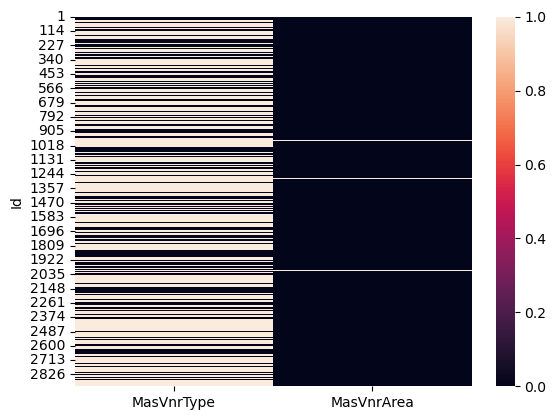

In [46]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [47]:
df[df[["MasVnrType" ,"MasVnrArea"]].isnull().any(axis=1)]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
2             20       RL         80.0     9600   Pave   NaN      Reg   
4             70       RL         60.0     9550   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
13            20       RL          NaN    12968   Pave   NaN      IR2   
16            45       RM         51.0     6120   Pave   NaN      Reg   
18            90       RL         72.0    10791   Pave   NaN      Reg   
19            20       RL         66.0    13695   Pave   NaN      Reg   
20            20       RL         70.0     7560   Pave   NaN      Reg   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
24           120       RM         44.0     4224   Pave   NaN      Reg   
25            20       RL          NaN     8246   Pave   NaN      IR1   
27            20       RL         60.0     7200   Pave   NaN      Reg   
29            20       RL         47.0    16321   Pave   NaN      IR1   
30            30       RM         60.0     6324   Pave   NaN      IR1   
31            70  C (all)         50.0     8500   Pave  Pave      Reg   
32            20       RL          NaN     8544   Pave   NaN      IR1   
33            20       RL         85.0    11049   Pave   NaN      Reg   
34            20       RL         70.0    10552   Pave   NaN      IR1   
37            20       RL        112.0    10859   Pave   NaN      Reg   
39            20       RL         68.0     7922   Pave   NaN      Reg   
40            90       RL         65.0     6040   Pave   NaN      Reg   
42            20       RL        115.0    16905   Pave   NaN      Reg   
43            85       RL          NaN     9180   Pave   NaN      IR1   
44            20       RL          NaN     9200   Pave   NaN      IR1   
45            20       RL         70.0     7945   Pave   NaN      Reg   
47            50       RL         48.0    12822   Pave   NaN      IR1   
48            20       FV         84.0    11096   Pave   NaN      Reg   
49           190       RM         33.0     4456   Pave   NaN      Reg   
50            20       RL         66.0     7742   Pave   NaN      Reg   
51            60       RL          NaN    13869   Pave   NaN      IR2   
52            50       RM         52.0     6240   Pave   NaN      Reg   
53            90       RM        110.0     8472   Grvl   NaN      IR2   
54            20       RL         68.0    50271   Pave   NaN      IR1   
55            80       RL         60.0     7134   Pave   NaN      Reg   
58            60       RL         89.0    11645   Pave   NaN      IR1   
60            20       RL         60.0     7200   Pave   NaN      Reg   
61            20       RL         63.0    13072   Pave   NaN      Reg   
62            75       RM         60.0     7200   Pave   NaN      Reg   
64            70       RM         50.0    10300   Pave   NaN      IR1   
69            30       RM         47.0     4608   Pave   NaN      Reg   
70            50       RL         81.0    15593   Pave   NaN      Reg   
72            20       RL         69.0     7599   Pave   NaN      Reg   
75            50       RM         60.0     5790   Pave   NaN      Reg   
76           180       RM         21.0     1596   Pave   NaN      Reg   
77            20       RL          NaN     8475   Pave   NaN      IR1   
78            50       RM         50.0     8635   Pave   NaN      Reg   
79            90       RL         72.0    10778   Pave   NaN      Reg   
80            50       RM         60.0    10440   Pave  Grvl      Reg   
87            60       RL        122.0    11911   Pave   NaN      IR2   
89            50  C (all)        105.0     8470   Pave   NaN    

In [48]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [49]:
MasVnrType_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, utilities_mode ,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\773489884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan, utilities_mode ,inplace=True)


0

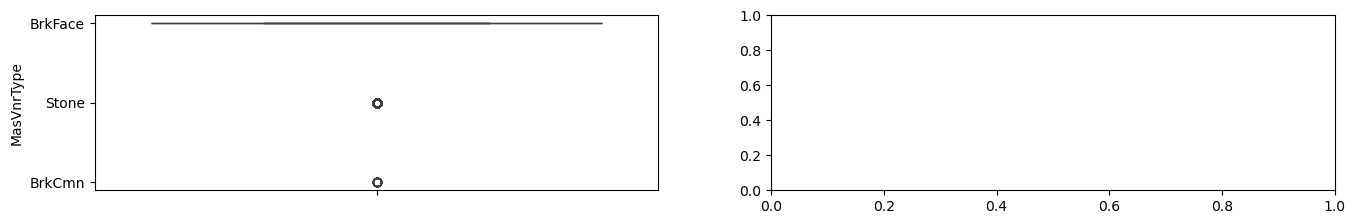

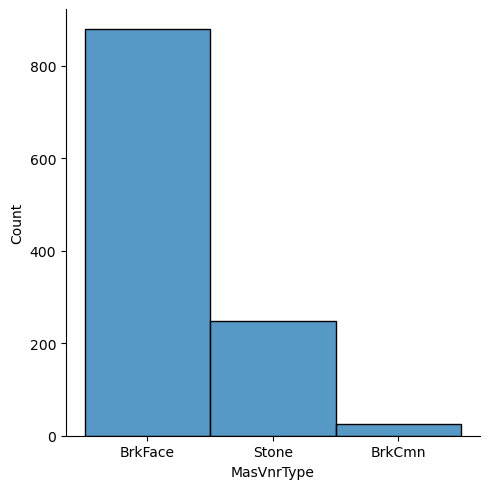

In [50]:
boxHistPlot(df["MasVnrType"])

In [51]:
MasVnrType_contv = 0
df_mvi["MasVnrType"].replace(np.nan, utilities_mode ,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\2546800212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan, utilities_mode ,inplace=True)


0

In [52]:
## handling Bsmt Features

In [53]:
cat_bsmt_feat =["BsmtQual" ,"BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1" ,"BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtHalfBath"]

<Axes: ylabel='Id'>

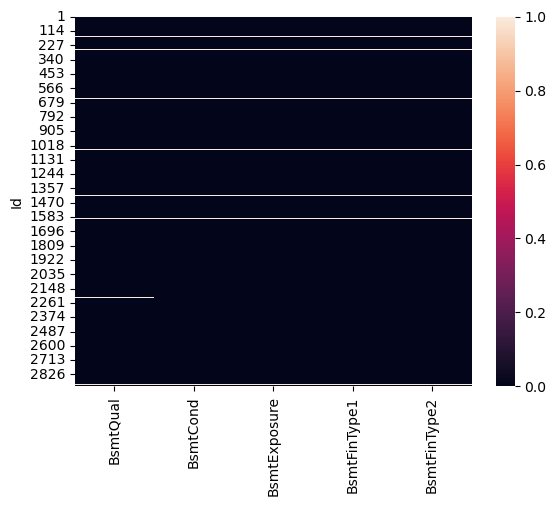

In [54]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [55]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [56]:
bsmt_cont ="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan ,bsmt_cont)
    

In [57]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

<Axes: ylabel='Id'>

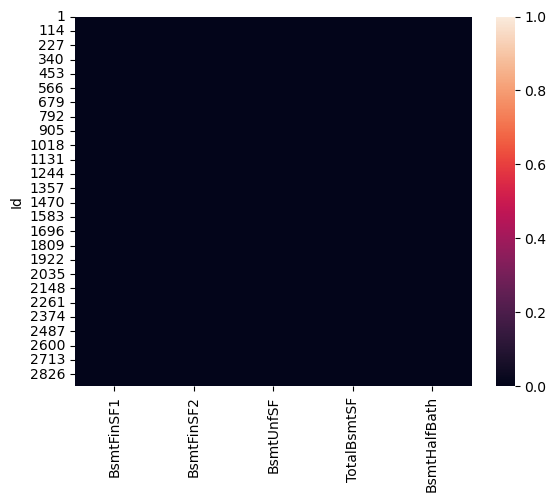

In [58]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [59]:
df_bsmt=df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
Id                                                                          
18        NaN      NaN          NaN          NaN          NaN         0.0   
40        NaN      NaN          NaN          NaN          NaN         0.0   
91        NaN      NaN          NaN          NaN          NaN         0.0   
103       NaN      NaN          NaN          NaN          NaN         0.0   
157       NaN      NaN          NaN          NaN          NaN         0.0   
183       NaN      NaN          NaN          NaN          NaN         0.0   
260       NaN      NaN          NaN          NaN          NaN         0.0   
333        Gd       TA           No          GLQ          NaN      1124.0   
343       NaN      NaN          NaN          NaN          NaN         0.0   
363       NaN      NaN          NaN          NaN          NaN         0.0   
372       NaN      NaN          NaN          NaN          NaN         0.0   
393       NaN      NaN          NaN          NaN          NaN         0.0   
521       NaN      NaN          NaN          NaN          NaN         0.0   
533       NaN      NaN          NaN          NaN          NaN         0.0   
534       NaN      NaN          NaN          NaN          NaN         0.0   
554       NaN      NaN          NaN          NaN          NaN         0.0   
647       NaN      NaN          NaN          NaN          NaN         0.0   
706       NaN      NaN          NaN          NaN          NaN         0.0   
737       NaN      NaN          NaN          NaN          NaN         0.0   
750       NaN      NaN          NaN          NaN          NaN         0.0   
779       NaN      NaN          NaN          NaN          NaN         0.0   
869       NaN      NaN          NaN          NaN          NaN         0.0   
895       NaN      NaN          NaN          NaN          NaN         0.0   
898       NaN      NaN          NaN          NaN          NaN         0.0   
949        Gd       TA          NaN          Unf          Unf         0.0   
985       NaN      NaN          NaN          NaN          NaN         0.0   
1001      NaN      NaN          NaN          NaN          NaN         0.0   
1012      NaN      NaN          NaN          NaN          NaN         0.0   
1036      NaN      NaN          NaN          NaN          NaN         0.0   
1046      NaN      NaN          NaN          NaN          NaN         0.0   
1049      NaN      NaN          NaN          NaN          NaN         0.0   
1050      NaN      NaN          NaN          NaN          NaN         0.0   
1091      NaN      NaN          NaN          NaN          NaN         0.0   
1180      NaN      NaN          NaN          NaN          NaN         0.0   
1217      NaN      NaN          NaN          NaN          NaN         0.0   
1219      NaN      NaN          NaN          NaN          NaN         0.0   
1233      NaN      NaN          NaN          NaN          NaN         0.0   
1322      NaN      NaN          NaN          NaN          NaN         0.0   
1413      NaN      NaN          NaN          NaN          NaN         0.0   
1488       Gd       TA          NaN          Unf          Unf         0.0   
1586      NaN      NaN          NaN          NaN          NaN         0.0   
1594      NaN      NaN          NaN          NaN          NaN         0.0   
1730      NaN      NaN          NaN          NaN          NaN         0.0   
1779      NaN      NaN          NaN          NaN          NaN         0.0   
1815      NaN      NaN          NaN          NaN          NaN         0.0   
1848      NaN      NaN          NaN          NaN          NaN         0.0   
1849      NaN      NaN          NaN          NaN          NaN         0.0   
1857      NaN      NaN          NaN          NaN          NaN         0.0   
1858      NaN      NaN          NaN          NaN          NaN         0.0   
1859      NaN      NaN          NaN          NaN          NaN         0.0   
1

In [60]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num )

In [61]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtHalfBath    2
dtype: int64

## handling Electrical =0.034258 and KitchenQual = 0.034258


In [62]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [63]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [64]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

Electrical KitchenQual  KitchenAbvGr
Id                                       
1380        NaN          Gd             1
1556      SBrkr         NaN             1

In [65]:
Electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, Electrical_mode ,inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\2489444089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, Electrical_mode ,inplace=True)


0

In [66]:
KitchenQual_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode ,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\2619913534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode ,inplace=True)


0

In [67]:
KitchenAbvGr_mode=df["KitchenAbvGr"].mode()[0]
df_mvi["KitchenAbvGr"].replace(np.nan, KitchenAbvGr_mode ,inplace=True)
df_mvi["KitchenAbvGr"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\1432759868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenAbvGr"].replace(np.nan, KitchenAbvGr_mode ,inplace=True)


0

In [68]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [69]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [70]:
Functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, Functional_mode ,inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\990667397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan, Functional_mode ,inplace=True)


0

In [71]:
SaleType_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, SaleType_mode ,inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\4067160606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, SaleType_mode ,inplace=True)


0

In [72]:
other_cat_feat =["FireplaceQu", "PoolQC",
"Fence",
"MiscFeature"]
for feat in other_cat_feat:

    print(f"Value count of {feat}: {df[feat].value_counts()}" )

Value count of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value count of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value count of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value count of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [73]:
FireplaceQu_cont= "NA"
df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_cont,inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\962695741.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_cont,inplace=True)


0

In [74]:
PoolQC_cont="NA"
df_mvi["PoolQC"].replace(np.nan, PoolQC_cont ,inplace=True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\3771249166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan, PoolQC_cont ,inplace=True)


0

In [75]:
Fence_cont="NA"
df_mvi["Fence"].replace(np.nan, Fence_cont ,inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\2747406916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, Fence_cont ,inplace=True)


0

In [76]:
MiscFeature_cont= "NA"
df_mvi["MiscFeature"].replace(np.nan, MiscFeature_cont ,inplace=True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\240624789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan, MiscFeature_cont ,inplace=True)


0

## hanadling Garage Feature

In [77]:

cat_garage_feat = ["GarageType","GarageFinish","GarageQual","GarageCond"]
num_garage_feat = ["GarageYrBlt","GarageCars","GarageArea"]

df_garafe=df[num_garage_feat + cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

GarageYrBlt  GarageCars  GarageArea GarageType GarageFinish GarageQual  \
Id                                                                             
40            NaN         0.0         0.0        NaN          NaN        NaN   
49            NaN         0.0         0.0        NaN          NaN        NaN   
79            NaN         0.0         0.0        NaN          NaN        NaN   
89            NaN         0.0         0.0        NaN          NaN        NaN   
90            NaN         0.0         0.0        NaN          NaN        NaN   
100           NaN         0.0         0.0        NaN          NaN        NaN   
109           NaN         0.0         0.0        NaN          NaN        NaN   
126           NaN         0.0         0.0        NaN          NaN        NaN   
128           NaN         0.0         0.0        NaN          NaN        NaN   
141           NaN         0.0         0.0        NaN          NaN        NaN   
149           NaN         0.0         0.0        NaN          NaN        NaN   
156           NaN         0.0         0.0        NaN          NaN        NaN   
164           NaN         0.0         0.0        NaN          NaN        NaN   
166           NaN         0.0         0.0        NaN          NaN        NaN   
199           NaN         0.0         0.0        NaN          NaN        NaN   
211           NaN         0.0         0.0        NaN          NaN        NaN   
242           NaN         0.0         0.0        NaN          NaN        NaN   
251           NaN         0.0         0.0        NaN          NaN        NaN   
288           NaN         0.0         0.0        NaN          NaN        NaN   
292           NaN         0.0         0.0        NaN          NaN        NaN   
308           NaN         0.0         0.0        NaN          NaN        NaN   
376           NaN         0.0         0.0        NaN          NaN        NaN   
387           NaN         0.0         0.0        NaN          NaN        NaN   
394           NaN         0.0         0.0        NaN          NaN        NaN   
432           NaN         0.0         0.0        NaN          NaN        NaN   
435           NaN         0.0         0.0        NaN          NaN        NaN   
442           NaN         0.0         0.0        NaN          NaN        NaN   
465           NaN         0.0         0.0        NaN          NaN        NaN   
496           NaN         0.0         0.0        NaN          NaN        NaN   
521           NaN         0.0         0.0        NaN          NaN        NaN   
529           NaN         0.0         0.0        NaN          NaN        NaN   
534           NaN         0.0         0.0        NaN          NaN        NaN   
536           NaN         0.0         0.0        NaN          NaN        NaN   
563           NaN         0.0         0.0        NaN          NaN        NaN   
583           NaN         0.0         0.0        NaN          NaN        NaN   
614           NaN         0.0         0.0        NaN          NaN        NaN   
615           NaN         0.0         0.0        NaN          NaN        NaN   
621           NaN         0.0         0.0        NaN          NaN        NaN   
636           NaN         0.0         0.0        NaN          NaN        NaN   
637           NaN         0.0         0.0        NaN          NaN        NaN   
639           NaN         0.0         0.0        NaN          NaN        NaN   
650           NaN         0.0         0.0        NaN          NaN        NaN   
706           NaN         0.0         0.0        NaN          NaN        NaN   
711           NaN         0.0         0.0        NaN          NaN        NaN   
739           NaN         0.0         0.0        NaN          NaN        NaN   
751           NaN         0.0         0.0        NaN          NaN        NaN   
785           NaN         0.0         0.0        NaN          NaN        NaN   
827           NaN         0.0         0.0        NaN          NaN        NaN   
844   

In [78]:
garage_cont= "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan ,garage_cont ,inplace=True)

df_mvi[cat_garage_feat].isnull().sum()
    

C:\Users\binay\AppData\Local\Temp\ipykernel_2112\1250162999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan ,garage_cont ,inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [79]:
garage_num= 0
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan ,garage_num )

df_mvi[num_garage_feat].isnull().sum()
    

GarageYrBlt    159
GarageCars       1
GarageArea       1
dtype: int64

In [80]:
df_mvi.isnull().any(axis=1).sum()

2838

## Feature Transformamtion
## convert Numerical Feature to Categorical Feature

In [81]:
for_num_conv=["MSSubClass" ,"YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]


for feat in for_num_conv:

    print(f"(feat):data type={df_mvi[feat].dtype}")

(feat):data type=int64
(feat):data type=int64
(feat):data type=int64
(feat):data type=float64
(feat):data type=int64
(feat):data type=int64


In [82]:
df_mvi[for_num_conv].head()

MSSubClass  YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
Id                                                                  
1           60       2003          2003       2003.0       2    2008
2           20       1976          1976       1976.0       5    2007
3           60       2001          2002       2001.0       9    2008
4           70       1915          1970       1998.0       2    2006
5           60       2000          2000       2000.0      12    2008

In [83]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [84]:
calendar.month_abbr[12]

'Dec'

In [85]:
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x:calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [86]:
for feat in for_num_conv:
    df_mvi[feat] =df_mvi[feat].astype(str)

In [87]:
for feat in for_num_conv:
    print(f"{feat}:data type ={df_mvi[feat].dtype}")

MSSubClass:data type =object
YearBuilt:data type =object
YearRemodAdd:data type =object
GarageYrBlt:data type =object
MoSold:data type =object
YrSold:data type =object


## Convert Categorical Features into NUmerical Feature

## original Encoding

In [88]:
ordinal_end_var = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
]
print("Total number of features to convert ordinal numerical format:",len(ordinal_end_var))   

Total number of features to convert ordinal numerical format: 18


In [89]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [90]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [91]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [92]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['BsmtExposure'] = df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered=True)).cat.codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered=True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered=True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NoSeWa', 'NoSeWr', 'AllPub'], ordered=True)).cat.codes


In [93]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

## one hot encodinng for nomina categorical data|

In [94]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features : ", len(object_features))

print("Features: \n ", object_features)


Total object data type features :  32
Features: 
  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [95]:
df_encod[object_features].head(2)

MSSubClass MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
Id                                                                             
1          60       RL   Pave   NaN      Reg         Lvl    Inside       Gtl   
2          20       RL   Pave   NaN      Reg         Lvl       FR2       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle YearBuilt  \
Id                                                                    
1       CollgCr       Norm       Norm     1Fam     2Story      2003   
2       Veenker      Feedr       Norm     1Fam     1Story      1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                      
1          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          1976     Gable  CompShg     MetalSd     MetalSd     AllPub   

   Foundation Heating CentralAir Electrical GarageType GarageYrBlt Fence  \
Id                                                                         
1       PConc    GasA          Y      SBrkr     Attchd      2003.0    NA   
2      CBlock    GasA          Y      SBrkr     Attchd      1976.0    NA   

   MiscFeature MoSold YrSold SaleType SaleCondition  
Id                                                   
1           NA    Feb   2008       WD        Normal  
2           NA    May   2007       WD        Normal

In [96]:
# Keep only object features that are still present in df_encod
object_features = [col for col in object_features if col in df_encod.columns]

print("Shape of DF before encoding : ", df_encod.shape)

df_encod = pd.get_dummies(
    df_encod,
    columns=object_features,
    prefix=object_features,
    drop_first=True
)

print("Shape of DF after encoding : ", df_encod.shape)


Shape of DF before encoding :  (2919, 80)
Shape of DF after encoding :  (2919, 512)


In [97]:
df_encod.head(2)

LotFrontage  LotArea  Utilities  OverallQual  OverallCond  MasVnrArea  \
Id                                                                          
1          65.0     8450          3            7            5       196.0   
2          80.0     9600          3            6            8         0.0   

    ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
Id                                                                         
1           3          2         4         3            -1             4   
2           2          2         4         3             3             3   

    BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
Id                                                                            
1        706.0             1         0.0      150.0        856.0          4   
2        978.0             1         0.0      284.0       1262.0          4   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710           1.0           0.0   
2       1262         0             0       1262           0.0           1.0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                              
1          2         1             3             1            3             8   
2          2         0             3             1            2             6   

    Functional  Fireplaces  FireplaceQu  GarageFinish  GarageCars  GarageArea  \
Id                                                                              
1            7           0            0             2         2.0       548.0   
2            7           1            3             2         2.0       460.0   

    GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                
1            3           3           2           0           61   
2            3           3           2         298            0   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  \
Id                                                                     
1               0          0            0         0       0        0   
2               0          0            0         0       0        0   

    SalePrice  MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                              
1    208500.0           False           False           False           False   
2    181500.0           False           False           False           False   

    MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
Id                                                                              
1           False          False          False          False          False   
2            True          False          False          False          False   

    MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
Id                                                                              
1            True          False          False          False          False   
2           False          False          False          False          False   

    MSSubClass_90  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                      
1           False        False        False         True        False   
2           False        False        False         True        False   

    Street_Pave  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
Id                                                                      
1          True       False         False         False          True   
2          True       False         False         False      

In [98]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

In [99]:
## split Data For Trainig & testing

In [100]:
df_encod.shape

(2919, 512)

In [101]:
df_train.shape[0]


1460

In [102]:
len_train = df_train .shape[0]
len_train

1460

In [103]:
X_train = df_encod[:len_train].drop("SalePrice",axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test=df_encod[len_train:].drop("SalePrice",axis=1)
print( "x:" ,X_train.shape)
print("Y:",y_train.shape)
print("x_test:",X_test.shape)

x: (1460, 511)
Y: (1460,)
x_test: (1459, 511)


## Feature Scaling

In [104]:
sc = StandardScaler()
sc.fit(X_train)
X_train =sc.transform(X_train)
X_test= sc.transform(X_test)

In [105]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [106]:
X_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [107]:
###carry forword for deployment
#sc.mean_
#sc.n_features_in_
#sc.n_samples_seen_
#sc.scale_
#sc.with_mean
#sc.with_std


## TRAIN MLMODEL

In [110]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [115]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor


In [116]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

mlpr = MLPRegressor()
ir = IsotonicRegression()


In [117]:
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", svr],
    "c": ["SGDRegressor", sgdr],
    "d": ["KNeighborsRegressor", knr],
    "e": ["GaussianProcessRegressor", gpr],
    "f": ["DecisionTreeRegressor", dtr],
    "g": ["GradientBoostingRegressor", gbr],
    "h": ["RandomForestRegressor", rfr],
    "i": ["XGBRegressor", xgbr],
    "k": ["IsotonicRegression", ir]
}


In [126]:
from sklearn.impute import SimpleImputer

def test_model(model, X_train, y_train):
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)

    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train_imputed, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score


In [127]:
models_score = []
for model in models:
    print("Training model:", models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of model:", score)
    models_score.append([models[model][0], score[0]])

Training model: LinearRegression
Score of model: [-6.3066004234989864e+25]
Training model: SVR
Score of model: [-0.05213305122526795]
Training model: SGDRegressor
Score of model: [-5127.938694630647]
Training model: KNeighborsRegressor
Score of model: [0.5537292886120883]
Training model: GaussianProcessRegressor
Score of model: [-5.398730998696456]
Training model: DecisionTreeRegressor
Score of model: [0.6612611422291386]
Training model: GradientBoostingRegressor
Score of model: [0.8700735007625718]
Training model: RandomForestRegressor
Score of model: [0.8413599003027945]
Training model: XGBRegressor
Score of model: [0.8580340330661446]
Training model: IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder\anaconsa\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\New folder\anaconsa\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\New folder\anaconsa\Lib\site-packages\sklearn\isotonic.py", line 387, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\New folder\anaconsa\Lib\site-packages\sklearn\isotonic.py", line 302, in _build_y
    self._check_input_data_shape(X)
  File "D:\New folder\anaconsa\Lib\site-packages\sklearn\isotonic.py", line 286, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [128]:
models_score

[['LinearRegression', -6.3066004234989864e+25],
 ['SVR', -0.05213305122526795],
 ['SGDRegressor', -5127.938694630647],
 ['KNeighborsRegressor', 0.5537292886120883],
 ['GaussianProcessRegressor', -5.398730998696456],
 ['DecisionTreeRegressor', 0.6612611422291386],
 ['GradientBoostingRegressor', 0.8700735007625718],
 ['RandomForestRegressor', 0.8413599003027945],
 ['XGBRegressor', 0.8580340330661446]]